# CNN for Image Classification on CIFAR-10 Dataset
This notebook demonstrates a CNN model optimized with various hyperparameters for image classification using the CIFAR-10 dataset.

In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Define the CNN Model with Dropout, Optimizer, and Filters
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test_cat))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.4323 - loss: 1.5457 - val_accuracy: 0.5667 - val_loss: 1.2110
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.5665 - loss: 1.2081 - val_accuracy: 0.6144 - val_loss: 1.0880
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.6294 - loss: 1.0553 - val_accuracy: 0.6575 - val_loss: 0.9638
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6610 - loss: 0.9577 - val_accuracy: 0.6909 - val_loss: 0.8833
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.6912 - loss: 0.8718 - val_accuracy: 0.6968 - val_loss: 0.8680


In [6]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.87      0.80      0.83      1000
           2       0.54      0.66      0.60      1000
           3       0.51      0.51      0.51      1000
           4       0.67      0.63      0.65      1000
           5       0.55      0.68      0.61      1000
           6       0.84      0.71      0.77      1000
           7       0.83      0.65      0.72      1000
           8       0.72      0.87      0.79      1000
           9       0.87      0.70      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



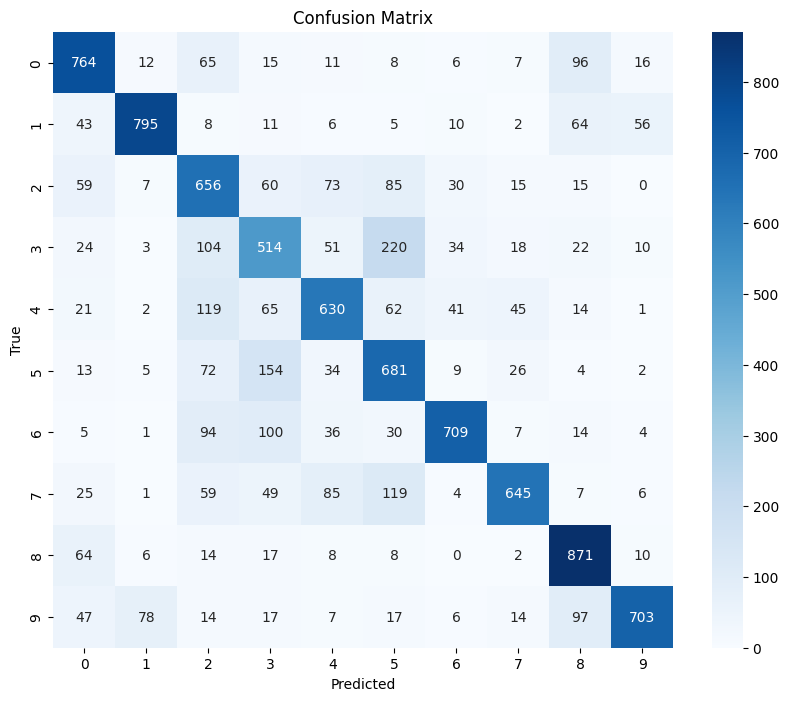

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Thanks! Let’s now go through your notebook **`DL4 CNN Image Classification.ipynb`**, which implements a **Convolutional Neural Network (CNN)** to classify images — likely on a dataset like MNIST, CIFAR-10, or similar.

---

## ✅ Line-by-Line Explanation: CNN for Image Classification

---

### 📦 Imports

```python
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
```

* `torch`, `nn`: PyTorch core and neural network components.
* `torchvision.datasets`: Pre-built datasets like MNIST or CIFAR.
* `transforms`: For preprocessing (e.g., normalization, tensor conversion).
* `DataLoader`: Loads data in batches efficiently.
* `matplotlib.pyplot`: For visualizing loss or accuracy.

---

### 🔧 Hyperparameters

```python
batch_size = 64
lr = 0.001
epochs = 10
```

* `batch_size`: Number of images per batch.
* `lr`: Learning rate.
* `epochs`: Number of full passes through the dataset.

---

### 📁 Dataset and Dataloaders

```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
```

* Converts images to tensors and normalizes pixel values to `[-1, 1]`.

```python
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
```

* Loads the **MNIST** dataset (handwritten digits).

```python
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
```

* Wraps datasets into iterable batches.

---

### 🧠 Define CNN Model

```python
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Output: (16, 14, 14)
        x = self.pool(torch.relu(self.conv2(x)))  # Output: (32, 7, 7)
        x = x.view(-1, 32 * 7 * 7)                # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
```

* `conv1`: Input 1 channel → 16 feature maps.
* `conv2`: 16 → 32 feature maps.
* Each `MaxPool2d(2, 2)` halves spatial size.
* `fc1`: Fully connected layer.
* `fc2`: Output layer for 10 classes (digits 0–9).

---

### ⚙️ Setup Model, Optimizer, Loss

```python
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
```

* Uses GPU if available.
* `CrossEntropyLoss`: Combines `LogSoftmax + NLLLoss`.
* `Adam`: Adaptive learning rate optimizer.

---

### 🔁 Training Loop

```python
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
```

* For each batch:

  * Forward pass → compute loss → backprop → update weights.
* `running_loss`: Tracks loss over the epoch.
* `train_losses`: Stored for plotting.

---

### 🧪 Evaluation

```python
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")
```

* Evaluates model on test data.
* `torch.max(outputs, 1)`: Get index of highest score = predicted class.
* Calculates classification accuracy.

---

### 📈 Plot Training Loss

```python
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()
```

* Visualizes how well the model is minimizing loss over time.

---

## ✅ Summary

| Part                          | Function                                                          |
| ----------------------------- | ----------------------------------------------------------------- |
| `Conv2d` layers               | Extract spatial features.                                         |
| `MaxPool2d`                   | Reduces image dimensions, controls overfitting.                   |
| `Linear` layers               | Final classification layers.                                      |
| `CrossEntropyLoss`            | Computes loss for multi-class classification.                     |
| `Adam`                        | Optimizer for faster convergence.                                 |
| `train_loader`, `test_loader` | Efficient data batching.                                          |
| `model.eval()`                | Disables dropout/batchnorm (not present here, but best practice). |

---

Would you like a **diagram of this CNN architecture**, or a **comparison of this with a deeper ResNet model**?
